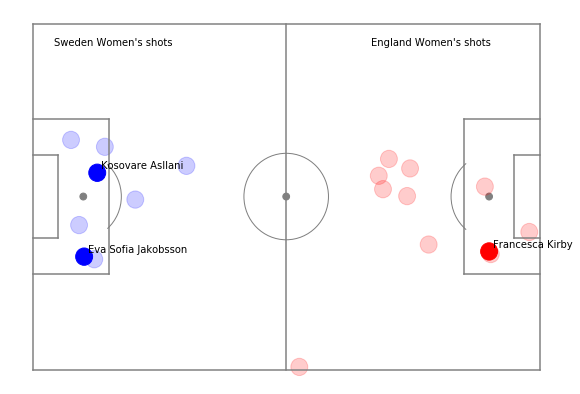

In [12]:
#Make a shot map and a pass map using Statsbomb data
#Set match id in match_id_required.

#Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
import json
with open('Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
# fig.savefig('shots.png', dpi=100) 
plt.show()

#Exercise: 
#1, Create a dataframe of passes which contains all the passes in the match
#2, Plot the start point of every Sweden pass. Attacking left to right.
#3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
#4, Plot arrows to show where the passes we


